In [11]:
import numpy as np
from scipy import optimize


# Linear Programming minimizes by default, so we need to add a - to the vector c
c = [-400,-200,-250]
A = [[3,1,1.5],[0.8, 0.2, 0.3],[1,1,1]]
b = [1000,300,625]

sol = optimize.linprog(c, A, b)

In [12]:
print("The optimum solution is:\n  * Corn: ",sol.x[0]," acre\n  * Wheat: ",sol.x[1]," acre\n  * Oats: ",sol.x[2]," acre")
print("The yield is $", -sol.fun)

The optimum solution is:
  * Corn:  41.666666666666664  acre
  * Wheat:  0.0  acre
  * Oats:  583.3333333333334  acre
The yield is $ 162500.0


In [13]:
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -162500.0
              x: [ 4.167e+01  0.000e+00  5.833e+02]
            nit: 3
          lower:  residual: [ 4.167e+01  0.000e+00  5.833e+02]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  9.167e+01  0.000e+00]
                 marginals: [-1.000e+02 -0.000e+00 -1.000e+02]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

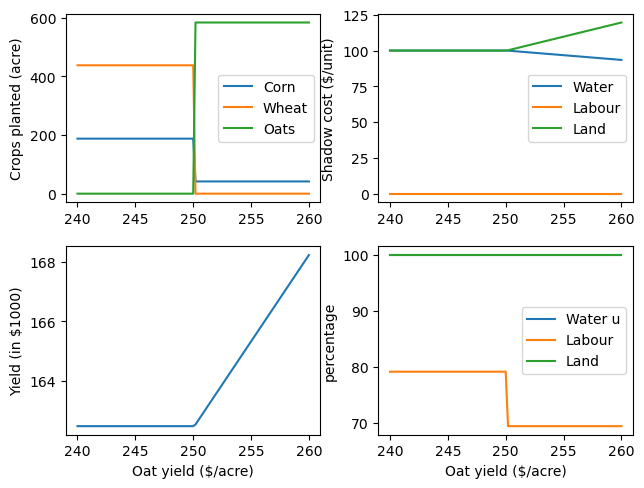

In [18]:
import matplotlib.pyplot as plt

# Let us study what happens for different prices of Oats from $240 to $260

# Linear Programming minimizes by default, so we need to add a - to the vector c
c = lambda op: [-400,-200,-op]
A = [[3,1,1.5],[0.8, 0.2, 0.3],[1,1,1]]
b = [1000,300,625]

oatsmin=240
oatsmax=260
N = 101
delta = (oatsmax-oatsmin)/N

corn = np.zeros(N)
wheat = np.zeros(N)
oats = np.zeros(N)
t_yield = np.zeros(N)
water = np.zeros(N)
labour = np.zeros(N)
land = np.zeros(N)

water_used = np.zeros(N)
labour_used = np.zeros(N)
land_used = np.zeros(N)
         
for i in range(N):
    oats_p = oatsmin+delta*i

    sol[i] = optimize.linprog(c(oats_p), A, b)

    corn[i] = sol[i].x[0]
    wheat[i] = sol[i].x[1]
    oats[i] = sol[i].x[2]

    t_yield[i] = -sol[i].fun/1000

    water[i] = -sol[i].ineqlin.marginals[0]
    labour[i] = -sol[i].ineqlin.marginals[1]
    land[i] = -sol[i].ineqlin.marginals[2]

    water_used[i] = 100*(3*corn[i]+1*wheat[i]+1.5*oats[i])/1000
    labour_used[i] = 100*(0.8*corn[i]+0.2*wheat[i]+0.3*oats[i])/300
    land_used[i] = 100*(corn[i]+wheat[i]+oats[i])/625

oats_x = np.linspace(oatsmin, oatsmax, N)


figure, axis = plt.subplots(2,2)

plt.tight_layout()

axis[0,0].plot(oats_x, corn, oats_x, wheat, oats_x, oats)
axis[0,0].set_ylabel("Crops planted (acre)")
#axis[0].set_xlabel("Oat yield ($/acre)")
axis[0,0].legend(["Corn","Wheat","Oats"])


axis[1,0].plot(oats_x, t_yield)
axis[1,0].set_ylabel("Yield (in $1000)")
axis[1,0].set_xlabel("Oat yield ($/acre)")


axis[0,1].plot(oats_x, water, oats_x, labour, oats_x, land)
axis[0,1].set_ylabel("Shadow cost ($/unit)")
#axis[0,1].set_xlabel("Oat yield ($/acre)")
axis[0,1].legend(["Water","Labour","Land"])

axis[1,1].plot(oats_x, water_used, oats_x, labour_used, oats_x, land_used)
axis[1,1].set_ylabel("percentage")
axis[1,1].set_xlabel("Oat yield ($/acre)")
axis[1,1].legend(["Water u","Labour","Land"])


#plt.savefig("farm-linearprog.png",bbox_inches = "tight")
plt.show()

